In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


- Returns are continuously compounded.
- The formula for a continuously compounded return between two prices is:
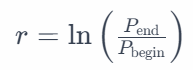

In [2]:
df = pd.read_csv('BOA_Event_Study.csv') ### need to ensure numbers are in numbers, not general or other formats in CSV
df

,Date,Open,High,Low,Close,Adj Close,Volume,SPX_Close,BOA_Ret,SPX_Ret
0,23/7/2007,48.459999,48.599998,48.020000,48.150002,36.184750,24454400,1541.57,NaN,NaN
1,24/7/2007,47.930000,48.139999,47.000000,47.150002,35.433243,33103600,1511.04,-0.020987,-0.020003
2,25/7/2007,47.450001,48.240002,46.900002,47.930000,36.019413,33727500,1518.09,0.016408,0.004655
3,26/7/2007,47.340000,47.720001,46.900002,47.230000,35.493359,51484500,1482.66,-0.014712,-0.023615
4,27/7/2007,47.540001,48.209999,47.349998,47.410000,35.628643,37536200,1458.95,0.003804,-0.016121
...,...,...,...,...,...,...,...,...,...,...
313,16/10/2008,24.410000,25.020000,22.110001,24.250000,19.798573,132357000,946.43,0.017891,0.041629
314,17/10/2008,23.540001,24.780001,23.160000,23.240000,18.973969,113718000,940.55,-0.042542,-0.006232
315,20/10/2008,23.920000,24.450001,23.010000,24.400000,19.921041,84862900,985.40,0.048709,0.046583
316,21/10/2008,23.950001,24.920000,23.700001,23.969999,19.569971,75498200,955.05,-0.017780,-0.031284


- day 0 is index 290: event date of 15 Sep 2008 for Estimation Period
- [40:280] : day -250  to -11 (inclusive)

# OLS model: use market return to predict return of a specific stock

In [6]:
df1=df.copy()
df2=df1.iloc[40:280,]

In [7]:
X2 = df2['SPX_Ret']
Y2 = df2['BOA_Ret']
Z2 = sm.add_constant(X2)

In [8]:
Z2

,const,SPX_Ret
40,1.0,0.028790
41,1.0,0.006068
42,1.0,-0.006746
43,1.0,0.004598
44,1.0,-0.005270
...,...,...
275,1.0,0.011269
276,1.0,-0.019821
277,1.0,0.003680
278,1.0,0.007951


In [9]:
model = sm.OLS(Y2, Z2).fit()
predictions = model.predict(Z2) 

results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                BOA_Ret   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     262.9
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           2.48e-40
Time:                        18:42:35   Log-Likelihood:                 549.75
No. Observations:                 240   AIC:                            -1096.
Df Residuals:                     238   BIC:                            -1089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.002     -0.402      0.6

In [11]:
df3=df.iloc[280:301,]

X3 = df3['SPX_Ret']
Y3 = df3['BOA_Ret']

C=model.params   ### C[0] gives intercept estimate; C[1] gives slope estimate

# choose one of these as Y 
AR = Y3 - C[0] - C[1]*X3 # Compute Abnormal Return AR
CAR = AR.cumsum()
MAR=Y3-X3
MeAR=Y3-np.mean(Y2)

Y = AR 

C:\Users\adam chem\AppData\Local\Temp\ipykernel_13244\3514546418.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  AR = Y3 - C[0] - C[1]*X3


# Plot Abnormal Return Graph for -10 to +10 trading days 

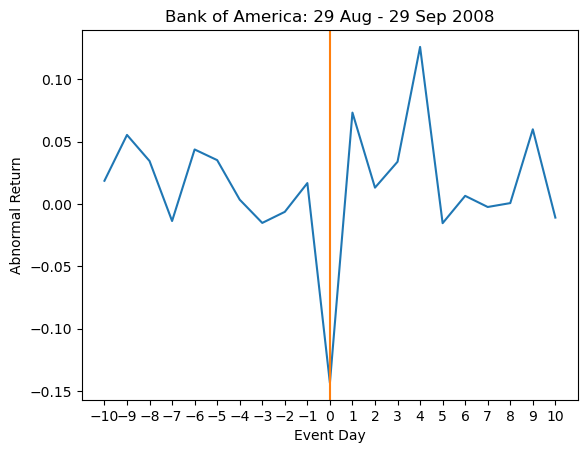

In [19]:
time = range(-10,11,1)  ### range(start, stop, step)

# plotting the points 
plt.plot(time, Y)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10])

plt.plot((0, 0), (-1, 1), scaley = False) # scaley = False --> not to autoscale y axis according to this plot
# draws a vertical line from y=-1 to y=1 at x=0

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('Y')
  
# giving a title to my graph
plt.title('Bank of America: 29 Aug - 29 Sep 2008')
  
# function to show the plot
plt.show()